<a href="https://colab.research.google.com/github/dhivarukha/task-bootcamp/blob/master/Mental_Health_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install matplotlib

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mental Health Social Media Dataset.csv')

In [6]:
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:58,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

In [8]:
data.groupby('2. Gender').size()

,0
2. Gender,
Female,263
Male,211
NB,1
Non binary,1
Non-binary,1
Nonbinary,1
There are others???,1
Trans,1
unsure,1


In [9]:
data.groupby(['3. Relationship Status', '2. Gender']).size().reset_index(name='Total')

,3. Relationship Status,2. Gender,Total
0,Divorced,Female,1
1,Divorced,Male,5
2,Divorced,Trans,1
3,In a relationship,Female,57
4,In a relationship,Male,30
5,In a relationship,There are others???,1
6,Married,Female,53
7,Married,Male,48
8,Single,Female,152
9,Single,Male,128


In [10]:
df=data.groupby(['3. Relationship Status', '2. Gender']).size().reset_index(name='Total')
df.head()

,3. Relationship Status,2. Gender,Total
0,Divorced,Female,1
1,Divorced,Male,5
2,Divorced,Trans,1
3,In a relationship,Female,57
4,In a relationship,Male,30


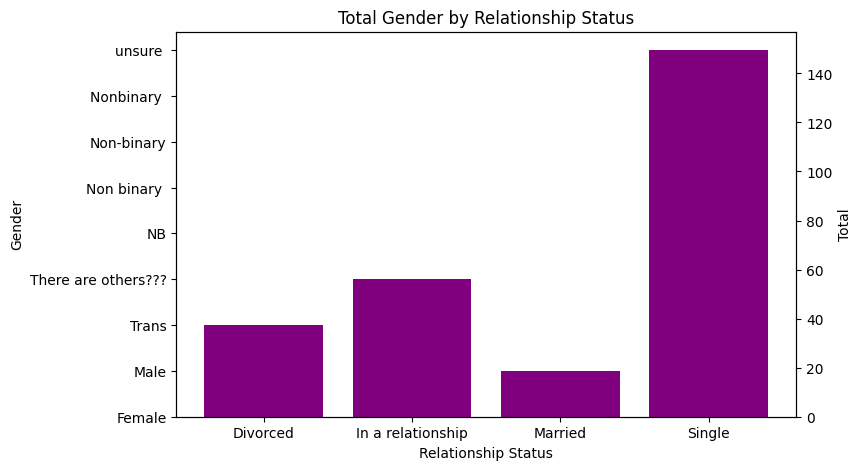

In [11]:
df=data.groupby(['3. Relationship Status', '2. Gender']).size().reset_index(name='Total')
# Buat figure dan axis utama
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot batang dengan sumbu X = Relationship Status, Y = Gender
bars = ax1.bar(df['3. Relationship Status'], df['2. Gender'], color='purple')

# Buat sumbu Y kedua untuk angka total
ax2 = ax1.twinx()
ax2.set_ylabel('Total')

# Atur rentang angka di sumbu Y kanan
ax2.set_ylim(0, df['Total'].max() + 5)  # Biar ada space lebih

# Tambahkan judul & label
ax1.set_xlabel('Relationship Status')
ax1.set_ylabel('Gender')
ax1.set_title('Total Gender by Relationship Status')

plt.show()

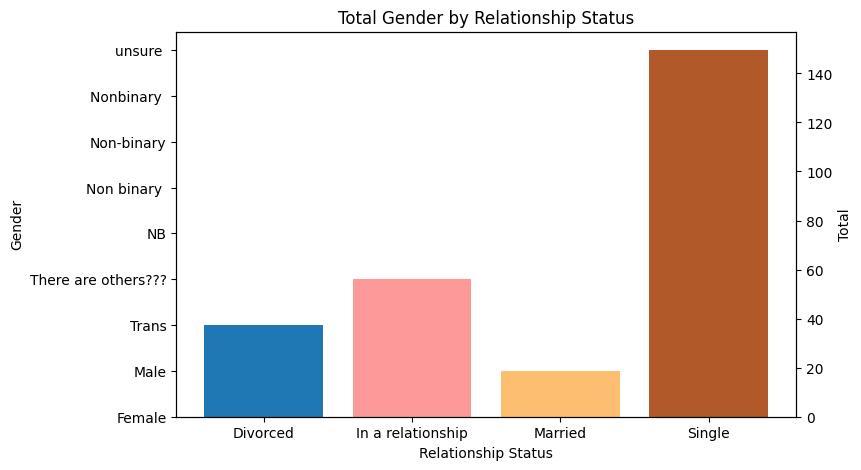

In [45]:
df=data.groupby(['3. Relationship Status', '2. Gender']).size().reset_index(name='Total')

# Buat figure dan axis utama
fig, ax1 = plt.subplots(figsize=(8, 5))

# Buat warna unik untuk setiap kategori Relationship Status
colors = plt.cm.Paired(np.linspace(0, df['3. Relationship Status'].nunique()))

# Plot batang dengan warna berbeda
bars = ax1.bar(df['3. Relationship Status'], df['2. Gender'], color=colors)

# Buat sumbu Y kedua untuk angka total
ax2 = ax1.twinx()
ax2.set_ylabel('Total')
ax2.set_ylim(0, df['Total'].max() + 5)  # Biar ada space lebih

# Tambahkan judul & label
ax1.set_xlabel('Relationship Status')
ax1.set_ylabel('Gender')
ax1.set_title('Total Gender by Relationship Status')

plt.show()


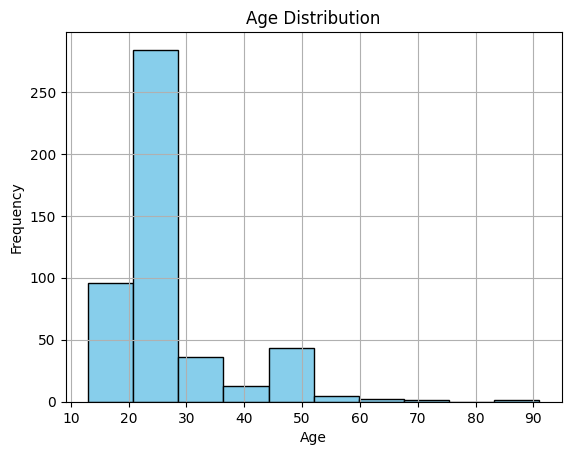

In [59]:
#1. Distribusi berdasarkan gender dan tingkat depresi
data['1. What is your age?'].hist(bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [52]:
df=data.groupby('2. Gender')['18. How often do you feel depressed or down?'].mean()

In [54]:
#2. Analisis Pengaruh Sosial Media terhadap Mental Health
df=data.groupby('8. What is the average time you spend on social media every day?')['13. On a scale of 1 to 5, how much are you bothered by worries?'].mean()

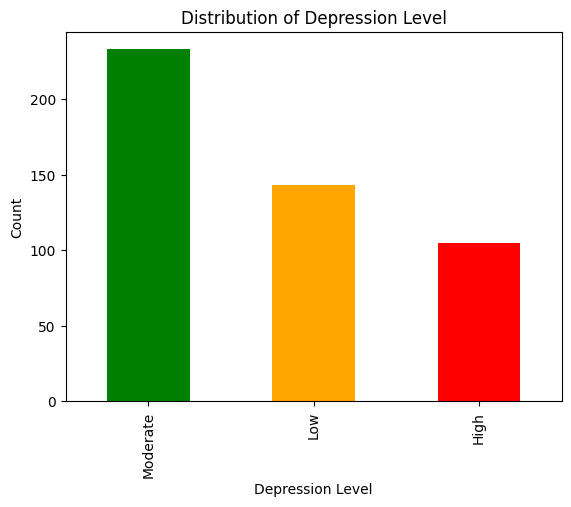

In [64]:
#3. Kategorisasi Berdasarkan Mental Health Factor
data['Depression_Level'] = ['Low' if x <= 2 else ('Moderate' if x <= 4 else 'High') for x in data['18. How often do you feel depressed or down?']]

#Depression Level
data['Depression_Level'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of Depression Level')
plt.xlabel('Depression Level')
plt.ylabel('Count')
plt.show()

In [69]:
#4. Apakah Status Hubungan Berpengaruh pada Mental Health?
#Apakah di tiap status hubungan memiliki tingkat stress yang berbeda?
df=data.groupby('3. Relationship Status')['13. On a scale of 1 to 5, how much are you bothered by worries?'].mean()

#Apakah orang yang sedang dalam hubungan lebih sering membandingkan diri di media sosial dibanding single?
df=data.groupby('3. Relationship Status')['15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?'].mean()


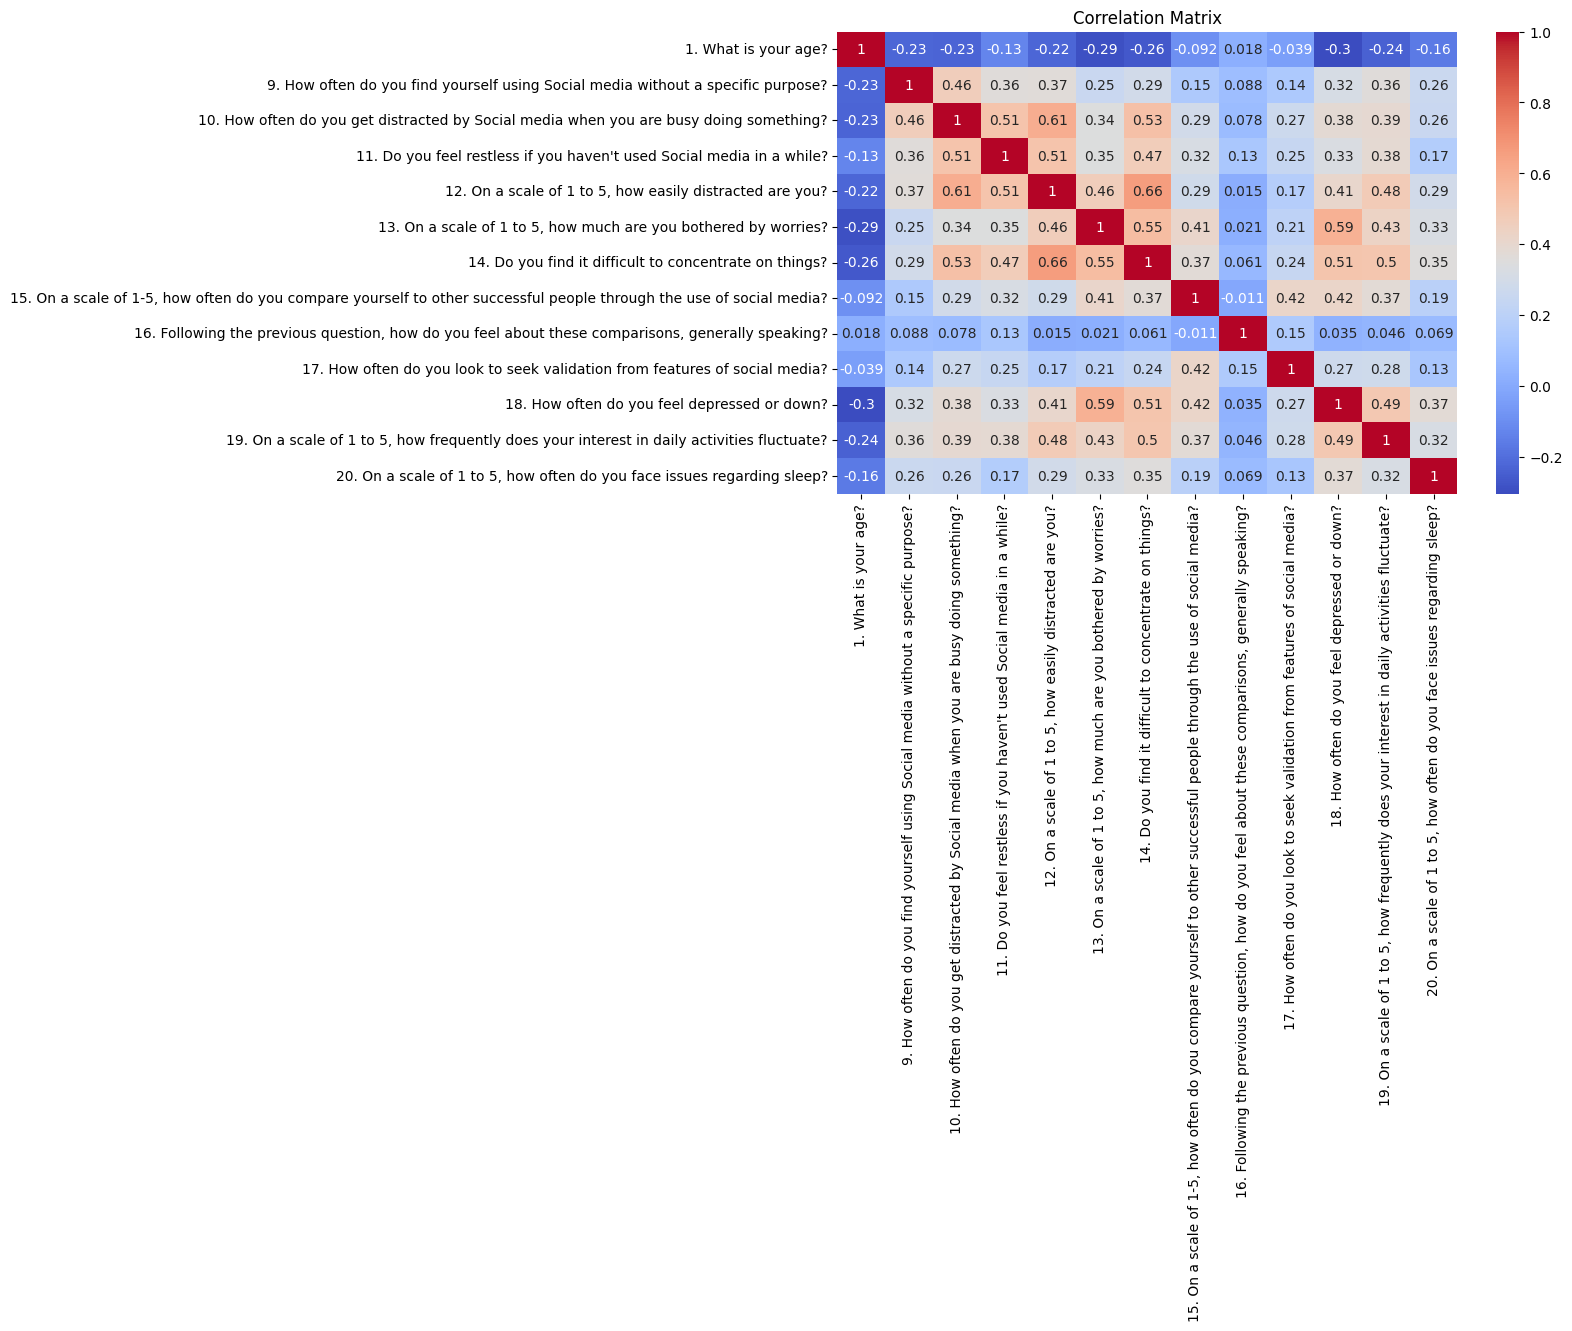

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

**1. Interpretasi Umum Korelasi**
  *   Korelasi berkisar dari -1 hingga 1:
    * +1 → Korelasi sempurna positif (jika satu naik, yang lain juga naik).
    * -1 → Korelasi sempurna negatif (jika satu naik, yang lain turun).
    * 0 → Tidak ada korelasi linear yang signifikan.

Jadi, semakin mendekati -1 atau +1, semakin kuat hubungannya.


---



**2. Insight Penting dari Correlation Matrix-mu**

📌 Hubungan antara Usia dan Penggunaan Media Sosial



*   "What is your age?" (Q1) vs. "How often do you use social media without a purpose?" (Q9) → -0.23
👉 Semakin tua usia, semakin jarang seseorang menggunakan media sosial tanpa tujuan.

*   Usia vs. Distraksi oleh media sosial (Q10) → -0.23
👉 Semakin tua, semakin jarang seseorang terdistraksi oleh media sosial saat sibuk.
*   Usia vs. Masalah tidur (Q20) → -0.16
👉 Efek kecil, tapi ada indikasi bahwa semakin tua seseorang, semakin jarang mereka mengalami masalah tidur terkait media sosial.


🔎 Kesimpulan:


*   Generasi muda cenderung lebih sering terdistraksi dan menggunakan media sosial tanpa tujuan dibandingkan yang lebih tua.
*   Orang yang lebih tua mungkin lebih sadar akan waktu mereka dan lebih disiplin dalam penggunaan media sosial.



---



**📌 Hubungan antara Media Sosial & Distraksi**

*   "How often do you get distracted by social media when busy?" (Q10) vs. "How often do you use social media without a purpose?" (Q9) → 0.46
👉 Semakin sering seseorang menggunakan media sosial tanpa tujuan, semakin besar kemungkinan mereka terdistraksi oleh media sosial saat sibuk.
*   Q10 vs. "Do you feel restless if you haven’t used social media in a while?" (Q11) → 0.51
👉 Orang yang sering terdistraksi oleh media sosial juga cenderung merasa gelisah jika tidak menggunakannya dalam waktu lama.


🔎 Kesimpulan:


*   Ada indikasi kecanduan media sosial, di mana semakin tinggi penggunaan tanpa tujuan, semakin tinggi pula tingkat distraksi dan kegelisahan.

*   Ini menunjukkan bahwa social media bisa berperan sebagai gangguan besar dalam produktivitas seseorang.


---


**📌 Hubungan antara Kesehatan Mental & Media Sosial**

* "How often do you feel depressed or down?" (Q18) vs. "How much are you bothered by worries?" (Q13) → 0.38
👉 Orang yang sering merasa khawatir cenderung juga lebih sering merasa depresi atau sedih.
* Q18 vs. "How frequently does your interest in daily activities fluctuate?" (Q19) → 0.49
👉 Orang yang sering merasa depresi juga cenderung memiliki ketertarikan yang fluktuatif terhadap aktivitas sehari-hari.
* Q18 vs. Masalah tidur (Q20) → 0.32
👉 Orang yang sering merasa depresi lebih cenderung mengalami masalah tidur.

🔎 Kesimpulan:

* Kesehatan mental sangat berkorelasi dengan fluktuasi minat dalam aktivitas, kekhawatiran, dan masalah tidur.
* Ada kemungkinan bahwa penggunaan media sosial yang tidak terkendali berkontribusi terhadap stres, kecemasan, dan depresi.

**📌 Hubungan antara Perbandingan Diri dengan Orang Lain & Kesehatan Mental**
* "How often do you compare yourself to others on social media?" (Q15) vs. "How often do you feel depressed or down?" (Q18) → 0.35
👉 Semakin sering seseorang membandingkan diri mereka dengan orang lain di media sosial, semakin tinggi kemungkinan mereka merasa depresi.
* Q15 vs. "How often do you seek validation from social media?" (Q17) → 0.21
👉 Orang yang sering membandingkan diri mereka juga lebih mungkin mencari validasi di media sosial.

🔎 Kesimpulan:

* Perbandingan sosial di media sosial berdampak negatif pada kesehatan mental, terutama pada perasaan depresi dan kebutuhan akan validasi.
* Orang yang sering mencari validasi dari media sosial bisa lebih rentan terhadap dampak negatifnya.


---


**3. Kesimpulan Umum**

🔹 Usia lebih muda cenderung lebih terdistraksi oleh media sosial, sering menggunakannya tanpa tujuan, dan memiliki kemungkinan lebih besar mengalami dampak negatifnya.

🔹 Orang yang sering menggunakan media sosial tanpa tujuan cenderung lebih mudah terdistraksi, lebih sering merasa gelisah jika tidak menggunakannya, dan lebih mungkin mengalami masalah kesehatan mental.

🔹 Perbandingan sosial di media sosial berkorelasi dengan depresi dan pencarian validasi, yang dapat berdampak negatif pada kesejahteraan mental.

**4. Rekomendasi untuk Analisis Lebih Lanjut**
  1. Uji Hipotesis 🔬
    * Lakukan uji statistik (misalnya regresi atau ANOVA) untuk melihat apakah hubungan ini signifikan secara statistik.
  2. Cluster Analysis 🏷️
    * Coba lakukan clustering (misalnya K-Means atau DBSCAN) untuk melihat apakah ada kelompok pengguna yang berbeda berdasarkan pola penggunaan media sosial dan kesehatan mental.
  3. Feature Importance 📊 (Machine Learning Approach)
    * Jika kamu ingin lebih lanjut, bisa menggunakan model seperti Random Forest atau XGBoost untuk melihat fitur mana yang paling berpengaruh terhadap masalah kesehatan mental dan distraksi.

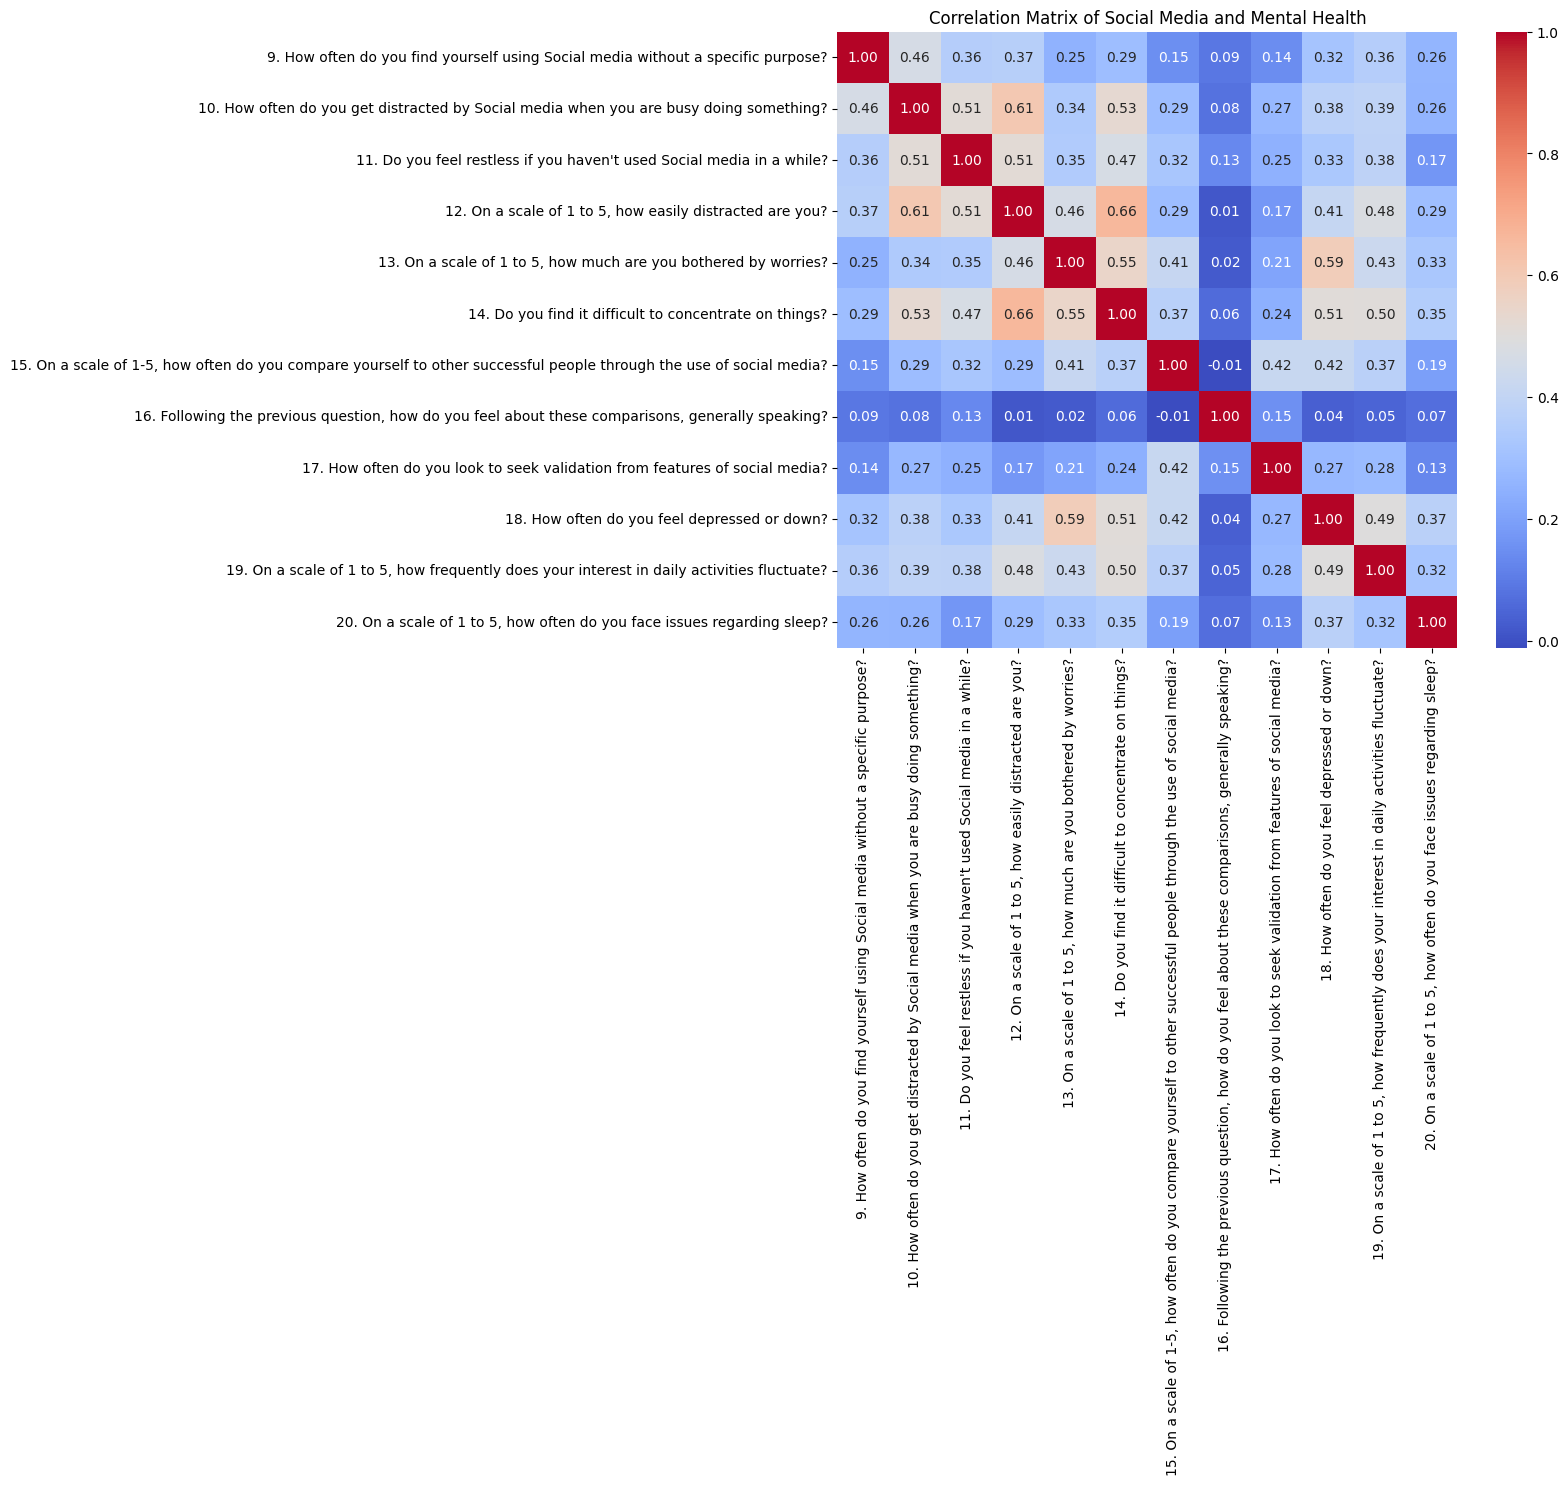

In [72]:
#Correlation Matrix (Heatmap)
cols = [
    '9. How often do you find yourself using Social media without a specific purpose?',
    '10. How often do you get distracted by Social media when you are busy doing something?',
    '11. Do you feel restless if you haven\'t used Social media in a while?',
    '12. On a scale of 1 to 5, how easily distracted are you?',
    '13. On a scale of 1 to 5, how much are you bothered by worries?',
    '14. Do you find it difficult to concentrate on things?',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
    '17. How often do you look to seek validation from features of social media?',
    '18. How often do you feel depressed or down?',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?'
]

# Hitung korelasi
corr_matrix = data[cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Social Media and Mental Health")
plt.show()

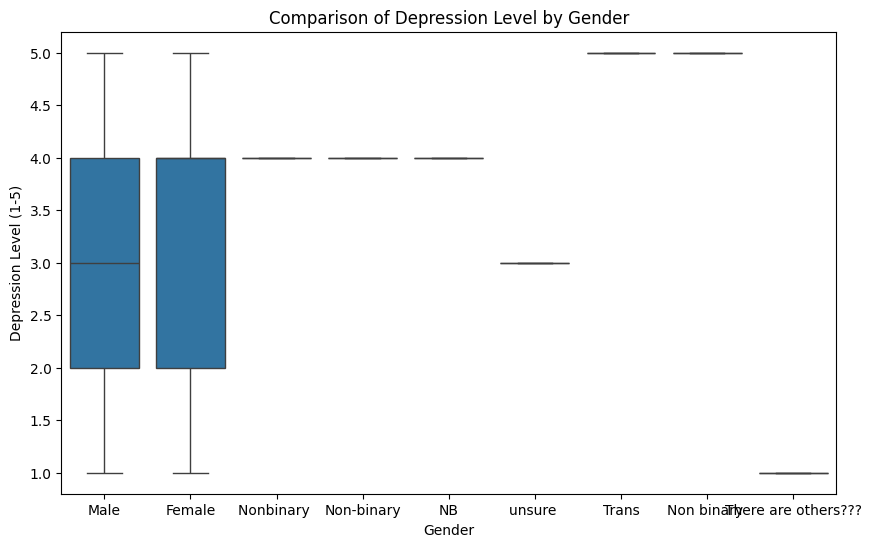

In [73]:
#Bar Chart / Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='2. Gender', y='18. How often do you feel depressed or down?', data=data)
plt.title("Comparison of Depression Level by Gender")
plt.xlabel("Gender")
plt.ylabel("Depression Level (1-5)")
plt.show()